## Evaluation

In [4]:
from transformers import AutoModelForSequenceClassification #, TrainingArguments, Trainer
from transformers import AlbertTokenizer #, AlbertModel
from transformers import TextClassificationPipeline

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [5]:
model = AutoModelForSequenceClassification.from_pretrained("/home/deimann/mbti-project/initial_train/checkpoint-20000", num_labels=16)
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=1)

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

true_labels = []
predicted_labels = []

for test in split_set["test"]:
  true_labels.append(test["labels"])
  predicted_label = pipeline(test["text"])[0]['label']
  if predicted_label == 'LABEL_0':
    predicted_labels.append(0)
  elif predicted_label == 'LABEL_1':
    predicted_labels.append(1)
  elif predicted_label == 'LABEL_2':
    predicted_labels.append(2)
  elif predicted_label == 'LABEL_3':
    predicted_labels.append(3)
  elif predicted_label == 'LABEL_4':
    predicted_labels.append(4)
  elif predicted_label == 'LABEL_5':
    predicted_labels.append(5)
  elif predicted_label == 'LABEL_6':
    predicted_labels.append(6)
  elif predicted_label == 'LABEL_7':
    predicted_labels.append(7)

  else:
    print("unexpected label")
    print(predicted_label)
  
  #to show the predicted labels see below
  #print(test["text"])
  #print(test["label"])
  #print()

print(f1_score(true_labels, predicted_labels, average='binary'))

/home/deimann/mbti-eval/8/first2train_bal-classification_cp8890.csv
              precision    recall  f1-score   support

        efin       0.20      0.05      0.08      2470
        efis       0.63      0.05      0.09      2460
        etin       0.20      0.09      0.13      2448
        etis       0.41      0.05      0.08      2599
        ifen       0.18      0.15      0.16      2547
        ifes       1.00      0.00      0.00      2464
        iten       0.14      0.85      0.24      2557
        ites       0.00      0.00      0.00      2455

    accuracy                           0.16     20000
   macro avg       0.34      0.15      0.10     20000
weighted avg       0.34      0.16      0.10     20000



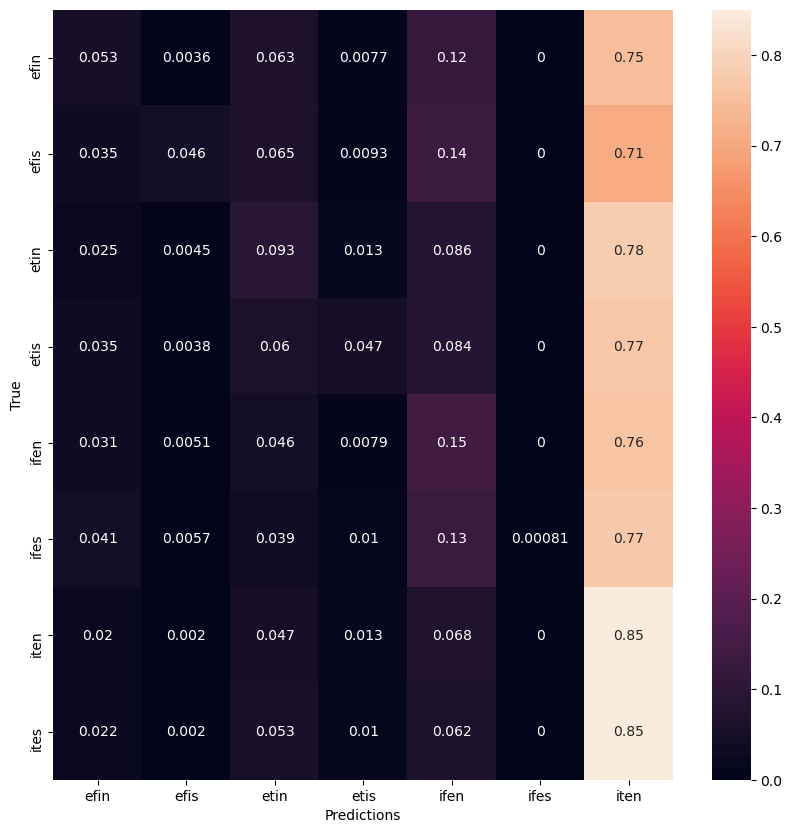

/home/deimann/mbti-eval/8/first2train_classification_cp8890.csv
              precision    recall  f1-score   support

        efin       0.22      0.05      0.08      2572
        efis       0.28      0.02      0.04       997
        etin       0.25      0.11      0.15      2962
        etis       0.27      0.06      0.10      1239
        ifen       0.27      0.15      0.20      3377
        ifes       0.00      0.00      0.00      1341
        iten       0.32      0.86      0.47      5956
        ites       0.00      0.00      0.00      1556

    accuracy                           0.31     20000
   macro avg       0.20      0.16      0.13     20000
weighted avg       0.24      0.31      0.21     20000



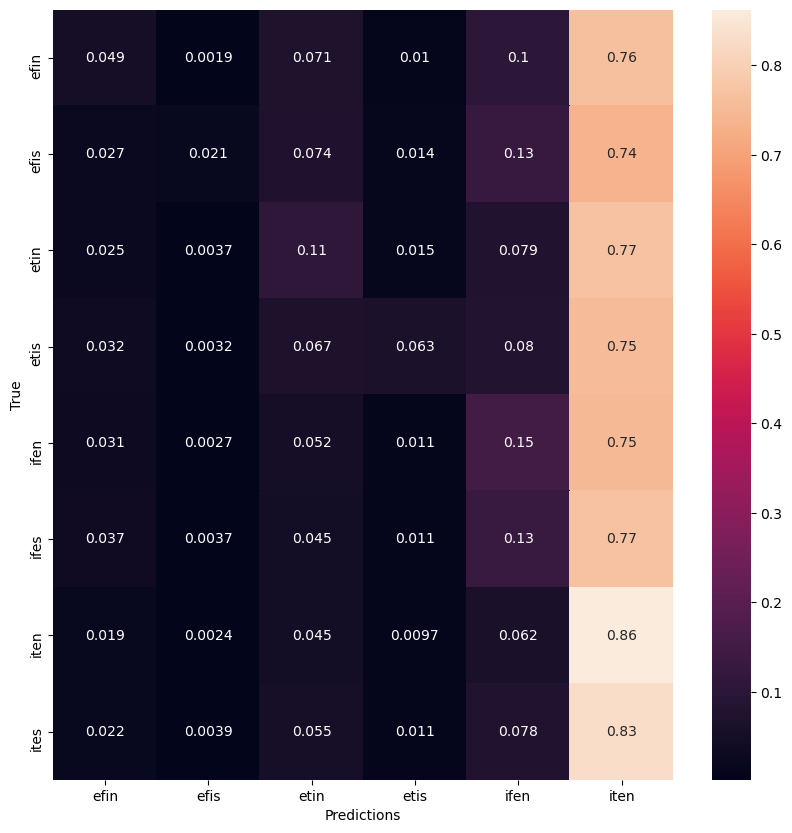

/home/deimann/mbti-eval/8/primtrain_classification_cp8890.csv
              precision    recall  f1-score   support

          EF       0.38      0.02      0.03       939
          EN       0.25      0.06      0.10      3101
          ES       0.00      0.00      0.00      1198
          ET       1.00      0.00      0.00       968
          IF       0.23      0.13      0.17      3288
          IN       0.24      0.66      0.35      4166
          IS       0.30      0.02      0.04      1697
          IT       0.32      0.40      0.36      4643

    accuracy                           0.26     20000
   macro avg       0.34      0.16      0.13     20000
weighted avg       0.29      0.26      0.20     20000



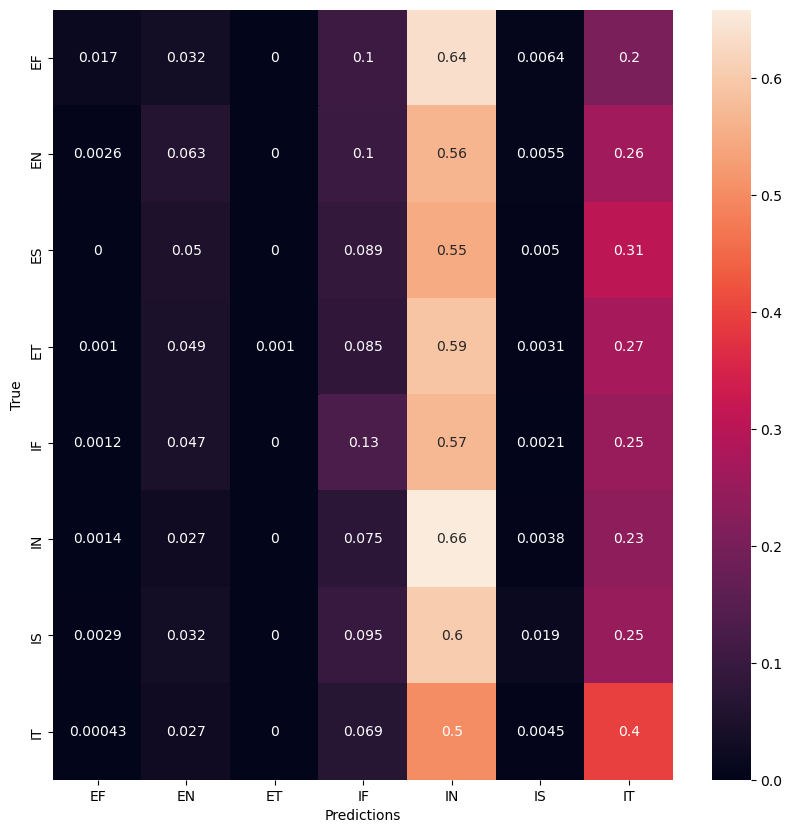

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

pathlist=['/home/deimann/mbti-eval/8/first2train_bal-classification_cp8890.csv','/home/deimann/mbti-eval/8/first2train_classification_cp8890.csv',
          '/home/deimann/mbti-eval/8/primtrain_classification_cp8890.csv']

for path in pathlist:

    df = pd.read_csv(path)

    true=df['True'].to_list()
    predicted=df['Predicted'].to_list()

    cross=pd.crosstab([true],[predicted],dropna=False,normalize='index',rownames=['True'],colnames=['Predictions'])

    print(path)
    print(classification_report(true,predicted, zero_division=0.0))
    plt.figure(figsize=(10, 10))
    sn.heatmap(cross, annot=True)
    plt.show()
#plt.savefig('cross_tabulation.heatmap.png', bbox_inches='tight')